# Diabetes XGBoost Local Mode
    Predict whether or not a person is at risk of developing diabetes
    Data Prep technique used was just imputation with mean by each group based on diabetes class
    
    XGBoost Training Parameters Source - https://xgboost.readthedocs.io/en/latest/parameter.html

In [1]:
# Command to install the below commands
# !conda install -c anaconda scikit-learn
!conda install -y -c conda-forge xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.0
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/anaconda3/envs/ml_conda37

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.11.8          |   py37hf985489_0         150 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         150 KB

The following packages will be UPDATED:

  ca-certificates                      2020.6.20-hecda079_0 --> 2020.11.8-h033912b_0
  certifi                          2020.6.20-py37h2987424_2 --> 2020.11.8-py37hf985489_0



certifi-2020.11.8    | 150 KB    | ##################################### | 100% 
Preparing transaction: done
Verifyi

In [10]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import pickle


In [11]:
column_list_file = './Files/diabetes_train_column_list.txt'
train_file = './Files/diabetes_train.csv'
validation_file = './Files/diabetes_validation.csv'


In [12]:
## Added in and made some changes for Kaggle Submission

In [13]:

# test_file = './diabetes-classification/test.csv'
# submission_file = './diabetes-classification/sample_submission.csv'
# kaggle_train_file = './diabetes-classification/train.csv'

# test = pd.read_csv(test_file,index_col = 'p_id')
# train = pd.read_csv(kaggle_train_file,index_col = 'p_id')
# submission = pd.read_csv(submission_file,index_col = 'p_id')



## Extract Training, Validation files and Columns

In [14]:

with open(column_list_file,'r') as f:
    columns = f.read().split(',')
    
columns




['diabetes_class',
 'preg_count',
 'glucose_concentration',
 'diastolic_bp',
 'triceps_skin_fold_thickness',
 'two_hr_serum_insulin',
 'bmi',
 'diabetes_pedi',
 'age']

In [15]:

df_train = pd.read_csv(train_file, names=columns)

df_validation = pd.read_csv(validation_file,names=columns)
print(df_train.shape)

print(df_validation.shape)

(537, 9)
(231, 9)


In [16]:
# Remember to Flatten target to 1D array with ravel()
X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0].ravel()

X_valid = df_validation.iloc[:,1:]
y_valid = df_validation.iloc[:,0].ravel()

print(X_train.shape)
print(y_train.shape)

print(X_valid.shape)
print(y_valid.shape)
X_valid.head()

(537, 8)
(537,)
(231, 8)
(231,)


,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
0,1.000,130.0,70.0,13.000000,105.000000,25.9,0.472,22
1,8.000,133.0,72.0,22.164179,100.335821,32.9,0.270,39
2,3.298,137.0,68.0,14.000000,148.000000,24.8,0.143,21
3,2.000,88.0,74.0,19.000000,53.000000,29.0,0.229,22
4,9.000,130.0,70.0,22.164179,100.335821,34.2,0.652,45


In [17]:
classifier = xgb.XGBClassifier(objective="binary:logistic")
classifier

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [18]:
classifier.fit(X_train,
               y_train, 
               eval_set = [(X_train, y_train), (X_valid, y_valid)], 
               eval_metric=['logloss'],
               early_stopping_rounds= 20)

               

[0]	validation_0-logloss:0.49731	validation_1-logloss:0.53781
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 20 rounds.
[1]	validation_0-logloss:0.38423	validation_1-logloss:0.43889
[2]	validation_0-logloss:0.31019	validation_1-logloss:0.38287
[3]	validation_0-logloss:0.25777	validation_1-logloss:0.34811
[4]	validation_0-logloss:0.21643	validation_1-logloss:0.32662
[5]	validation_0-logloss:0.18654	validation_1-logloss:0.31760
[6]	validation_0-logloss:0.16496	validation_1-logloss:0.30746
[7]	validation_0-logloss:0.14842	validation_1-logloss:0.29776
[8]	validation_0-logloss:0.13510	validation_1-logloss:0.29316
[9]	validation_0-logloss:0.12093	validation_1-logloss:0.29512
[10]	validation_0-logloss:0.10942	validation_1-logloss:0.28657
[11]	validation_0-logloss:0.10401	validation_1-logloss:0.28426
[12]	validation_0-logloss:0.09509	validation_1-logloss:0.28488
[13]	validation_0-logloss:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
evaluate_result = classifier.evals_result()
evaluate_result # Checking format



{'validation_0': {'logloss': [0.497314,
   0.384231,
   0.310187,
   0.257765,
   0.216435,
   0.186544,
   0.164964,
   0.148422,
   0.135098,
   0.120925,
   0.109419,
   0.104005,
   0.095093,
   0.087871,
   0.083241,
   0.077463,
   0.07268,
   0.068947,
   0.064882,
   0.061904,
   0.058246,
   0.055636,
   0.052385,
   0.050324,
   0.048791,
   0.046149,
   0.044374,
   0.042705,
   0.04005,
   0.03834,
   0.036537,
   0.035139,
   0.03405,
   0.032736,
   0.031583,
   0.030456,
   0.02958,
   0.02892,
   0.02798,
   0.027392,
   0.026824,
   0.026062,
   0.02546,
   0.0249,
   0.024517,
   0.024132,
   0.023572,
   0.022987,
   0.022465,
   0.021972]},
 'validation_1': {'logloss': [0.537808,
   0.438888,
   0.382873,
   0.348106,
   0.326625,
   0.317599,
   0.30746,
   0.297761,
   0.293163,
   0.295117,
   0.286569,
   0.284259,
   0.284876,
   0.285029,
   0.286391,
   0.286797,
   0.291159,
   0.290621,
   0.286691,
   0.287366,
   0.285339,
   0.284718,
   0.28464,
   0.28

In [20]:
rounds = range(len(evaluate_result['validation_0']['logloss']))
rounds

range(0, 50)

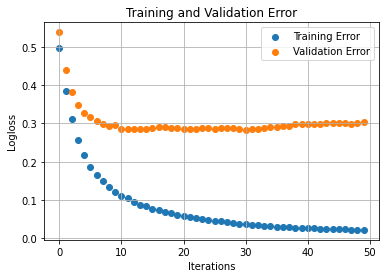

In [21]:
plt.scatter(x = rounds, y = evaluate_result['validation_0']['logloss'], label = 'Training Error')
plt.scatter(x = rounds, y = evaluate_result['validation_1']['logloss'], label = 'Validation Error')
plt.xlabel('Iterations')
plt.ylabel('Logloss')
plt.title('Training and Validation Error')
plt.legend()
plt.grid(True)
plt.show()

### Check which features are the most important

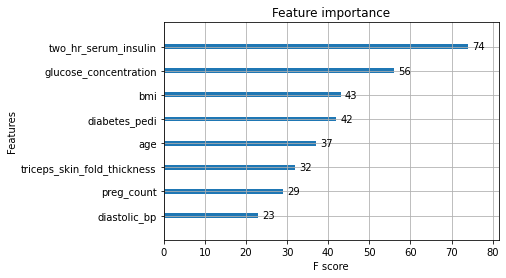

In [13]:
xgb.plot_importance(classifier)

In [16]:

results = classifier.predict(X_valid)
results

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [17]:
df_validation['predicted_class'] = results

In [18]:
df_validation.head()

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,predicted_class
0,0,1.000,130.0,70.0,13.000000,105.000000,25.9,0.472,22,0
1,1,8.000,133.0,72.0,22.164179,100.335821,32.9,0.270,39,1
2,0,3.298,137.0,68.0,14.000000,148.000000,24.8,0.143,21,0
3,0,2.000,88.0,74.0,19.000000,53.000000,29.0,0.229,22,0
4,1,9.000,130.0,70.0,22.164179,100.335821,34.2,0.652,45,1


In [19]:
print(classification_report(
    df_validation['diabetes_class'],
    df_validation['predicted_class'],
    labels=[1,0],
    target_names=['Diabetic','Normal']))

              precision    recall  f1-score   support

    Diabetic       0.85      0.78      0.82        79
      Normal       0.89      0.93      0.91       152

    accuracy                           0.88       231
   macro avg       0.87      0.86      0.86       231
weighted avg       0.88      0.88      0.88       231



### Save the model


In [20]:

filename = 'diabetes_xgboost_local_model.sav'
pickle.dump(classifer, open(filename, 'wb'))
 




NameError: name 'pickle' is not defined

### Load the model from disk

In [ ]:


# loaded_diabetes_xgboost_local_model = pickle.load(open(filename, 'rb'))


# result = loaded_diabetes_xgboost_local_model.score(X_test, Y_test)
# print(result)
 